In [1]:
import pandas as pd                  #for data handling
import numpy as np
import os
from PIL import Image                # For image loading
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm       # For nice progress bars in notebooks

                                     # PyTorch specific imports
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms


In [2]:
BASE_DIR = 'C:\sudha files\jupyterNB\MEDIC'

IMAGE_DIR = os.path.join(BASE_DIR , 'data')
TRAIN_TSV = os.path.join(BASE_DIR , 'MEDIC_train.tsv')
DEV_TSV = os.path.join(BASE_DIR, 'MEDIC_dev.tsv')        # This file lists pictures for checking our AI during training
TEST_TSV = os.path.join(BASE_DIR, 'MEDIC_test.tsv')      # This file lists pictures for the final test of our AI

print(f"Checking if our 'treasure map' points to real places:")
print(f"Is the 'data' folder there? {os.path.exists(IMAGE_DIR)}")
print(f"Is the 'train.tsv' file there? {os.path.exists(TRAIN_TSV)}")
print(f"Is the 'dev.tsv' file there? {os.path.exists(DEV_TSV)}")
print(f"Is the 'test.tsv' file there? {os.path.exists(TEST_TSV)}")


Checking if our 'treasure map' points to real places:
Is the 'data' folder there? True
Is the 'train.tsv' file there? True
Is the 'dev.tsv' file there? True
Is the 'test.tsv' file there? True


In [3]:
print("\n--- Loading our files (TSV) ---")

train_df = pd.read_csv(TRAIN_TSV, sep='\t')
dev_df = pd.read_csv(DEV_TSV, sep='\t')
test_df = pd.read_csv(TEST_TSV, sep='\t')

print(f"We have {len(train_df)} pictures to train our AI.")
print(f"We have {len(dev_df)} pictures to check our AI while it's learning.")
print(f"We have {len(test_df)} pictures for the final test.")

print("\n--- Let's look at the first few lines of our training guide: ---")
print(train_df.head())

print(train_df.tail())


--- Loading our files (TSV) ---
We have 49353 pictures to train our AI.
We have 6157 pictures to check our AI while it's learning.
We have 15688 pictures for the final test.

--- Let's look at the first few lines of our training guide: ---
     image_id                        event_name  \
0  ASONAM2017      ecuador_eq_severe_im_645.jpg   
1  ASONAM2017     ecuador_eq_severe_im_1378.jpg   
2  ASONAM2017  ecuador_eq_unlabelled_im_100.jpg   
3  ASONAM2017       ecuador_eq_mild_im_2573.jpg   
4  ASONAM2017  ecuador_eq_unlabelled_im_828.jpg   

                                          image_path damage_severity  \
0  data/ASONAM17_Damage_Image_Dataset/ecuador_eq/...          severe   
1  data/ASONAM17_Damage_Image_Dataset/ecuador_eq/...          severe   
2  data/ASONAM17_Damage_Image_Dataset/ecuador_eq/...  little_or_none   
3  data/ASONAM17_Damage_Image_Dataset/ecuador_eq/...            mild   
4  data/ASONAM17_Damage_Image_Dataset/ecuador_eq/...  little_or_none   

       informative 

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49353 entries, 0 to 49352
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   image_id         49353 non-null  object
 1   event_name       49353 non-null  object
 2   image_path       49353 non-null  object
 3   damage_severity  49353 non-null  object
 4   informative      49353 non-null  object
 5   humanitarian     49353 non-null  object
 6   disaster_types   49353 non-null  object
dtypes: object(7)
memory usage: 2.6+ MB


In [5]:
train_df.describe()
test_df.describe()

,image_id,event_name,image_path,damage_severity,informative,humanitarian,disaster_types
count,15688,15688,15688,15688,15688,15688,15688
unique,5,15688,15688,3,2,4,7
top,CrisisMMD,damaged_infrastructure/images/buildingcollapse...,data/multimodal-deep-learning-disaster-respons...,little_or_none,not_informative,not_humanitarian,not_disaster
freq,4842,1,1,10252,8482,9145,8885


In [6]:
#checking whether our data has any null values
train_df.isnull().sum()

image_id           0
event_name         0
image_path         0
damage_severity    0
informative        0
humanitarian       0
disaster_types     0
dtype: int64

In [7]:
# (rows , columns)
train_df.shape
#test_df.shape

(49353, 7)

In [8]:
# attributes (columns) names
train_df.columns

Index(['image_id', 'event_name', 'image_path', 'damage_severity',
       'informative', 'humanitarian', 'disaster_types'],
      dtype='object')


--- How many pictures do we have for each disaster type? (Training Set) ---
disaster_types
not_disaster      24459
earthquake        12296
hurricane          4517
flood              3401
other_disaster     1819
fire               1796
landslide          1065
Name: count, dtype: int64


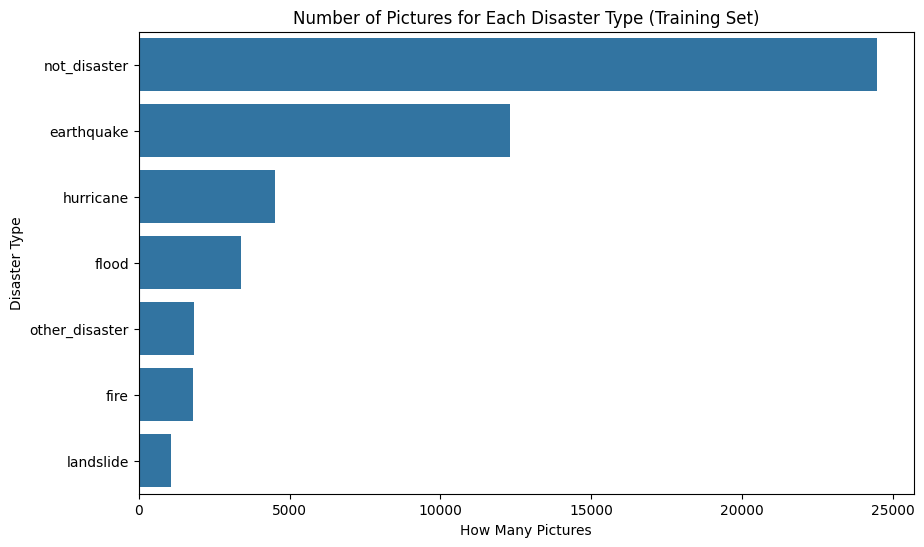


All the unique disaster types we found: ['earthquake' 'other_disaster' 'not_disaster' 'hurricane' 'landslide'
 'fire' 'flood']
Our secret number code for each disaster: {'earthquake': 0, 'other_disaster': 1, 'not_disaster': 2, 'hurricane': 3, 'landslide': 4, 'fire': 5, 'flood': 6}

--- Our training guide with the new secret numbers: ---
     image_id                        event_name  \
0  ASONAM2017      ecuador_eq_severe_im_645.jpg   
1  ASONAM2017     ecuador_eq_severe_im_1378.jpg   
2  ASONAM2017  ecuador_eq_unlabelled_im_100.jpg   
3  ASONAM2017       ecuador_eq_mild_im_2573.jpg   
4  ASONAM2017  ecuador_eq_unlabelled_im_828.jpg   

                                          image_path damage_severity  \
0  data/ASONAM17_Damage_Image_Dataset/ecuador_eq/...          severe   
1  data/ASONAM17_Damage_Image_Dataset/ecuador_eq/...          severe   
2  data/ASONAM17_Damage_Image_Dataset/ecuador_eq/...  little_or_none   
3  data/ASONAM17_Damage_Image_Dataset/ecuador_eq/...            m

In [9]:
print("\n--- How many pictures do we have for each disaster type? (Training Set) ---")
print(train_df['disaster_types'].value_counts()) # This counts how many times each unique 'label' appears

# Let's draw a picture (a bar chart) to make it even clearer!
plt.figure(figsize=(10, 6)) # Make the drawing space a good size
sns.countplot(y='disaster_types', data=train_df, order=train_df['disaster_types'].value_counts().index)
plt.title('Number of Pictures for Each Disaster Type (Training Set)') # Title for our drawing
plt.xlabel('How Many Pictures') # Label for the bottom axis
plt.ylabel('Disaster Type') # Label for the side axis
plt.show()



all_disaster_types = pd.concat([train_df['disaster_types'], dev_df['disaster_types'], test_df['disaster_types']]).unique()

# Now, we create a little dictionary (like a mini-phonebook)
# that maps each disaster name to a unique number.
label_to_idx = {label: i for i, label in enumerate(all_disaster_types)}
idx_to_label = {i: label for label, i in label_to_idx.items()}

print(f"\nAll the unique disaster types we found: {all_disaster_types}")
print(f"Our secret number code for each disaster: {label_to_idx}")

# Now, let's add these secret numbers to our flashcard guides!
# --- FIX 4 & 5 & 6: Change 'label' to your actual column name ---
train_df['label_idx'] = train_df['disaster_types'].map(label_to_idx)
dev_df['label_idx'] = dev_df['disaster_types'].map(label_to_idx)
test_df['label_idx'] = test_df['disaster_types'].map(label_to_idx)

print("\n--- Our training guide with the new secret numbers: ---")
print(train_df.head())

In [10]:
print("\n--- Setting up how we prepare our pictures ---")

# Most common AI models (especially famous pre-trained ones) like pictures that are 224x224 pixels.
image_size = 224

# These are like recipes for preparing our pictures.
# We have one recipe for training pictures and another for checking/testing pictures.
data_transforms = {
    'train': transforms.Compose([
        # 1. Randomly cut a piece out of the picture and stretch/squash it to 224x224.
        # This makes the AI see different parts of the image and at different scales.
        transforms.RandomResizedCrop(image_size),
        # 2. Sometimes flip the picture horizontally (left to right).
        # A flood looks like a flood whether it's flipped or not!
        transforms.RandomHorizontalFlip(),
        # 3. Convert the picture into a special 'tensor' format that PyTorch AI understands.
        # It also changes pixel values from 0-255 to 0-1.
        transforms.ToTensor(),
        # 4. Make the pixel values 'normal' using special numbers (mean and std).
        # This is like adjusting the brightness and contrast consistently for all pictures.
        # These specific numbers are used because many powerful AI models were first taught
        # using pictures that were normalized with these values.
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([ # This recipe is for our checking/testing pictures. NO flipping or random changes here!
        # 1. Resize the whole picture to 256 pixels on the shorter side.
        transforms.Resize(256),
        # 2. Cut out the exact center 224x224 part.
        transforms.CenterCrop(image_size),
        # 3. Convert to 'tensor' format.
        transforms.ToTensor(),
        # 4. Normalize with the same special numbers.
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ]),
    'test': transforms.Compose([ # Same recipe for testing pictures as for checking pictures.
        transforms.Resize(256),
        transforms.CenterCrop(image_size),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])
}
print("Picture preparation recipes are ready!")


--- Setting up how we prepare our pictures ---
Picture preparation recipes are ready!


In [28]:
class MEDICDataset(Dataset):
    def __init__(self, dataframe, img_dir, transform=None):
        self.dataframe = dataframe
        self.img_dir = img_dir
        self.transform = transform

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        # Use the full path from dataframe
        img_path = self.dataframe.iloc[idx]['image_path']

        # Ensure it points to the right root folder
        if not os.path.isabs(img_path):
            img_path = os.path.join(self.img_dir, img_path)

        if not os.path.exists(img_path):
            raise FileNotFoundError(f"Could not find image at {img_path}")

        image = Image.open(img_path).convert('RGB')
        label = self.dataframe.iloc[idx]['label_idx']

        if self.transform:
            image = self.transform(image)

        return image, label



# Now, let's make 3 actual helper robots, one for each set of flashcards:

train_dataset = MEDICDataset(dataframe=train_df, img_dir=IMAGE_DIR, transform=data_transforms['train'])
dev_dataset = MEDICDataset(dataframe=dev_df, img_dir=IMAGE_DIR, transform=data_transforms['val'])
test_dataset = MEDICDataset(dataframe=test_df, img_dir=IMAGE_DIR, transform=data_transforms['test'])

print(f"Our training flashcard set has: {len(train_dataset)} pictures.")
print(f"Our checking flashcard set has: {len(dev_dataset)} pictures.")
print(f"Our final test flashcard set has: {len(test_dataset)} pictures.")

Our training flashcard set has: 49353 pictures.
Our checking flashcard set has: 6157 pictures.
Our final test flashcard set has: 15688 pictures.


In [23]:
batch_size = 32
num_workers = 4

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=num_workers, pin_memory=True)
dev_loader = DataLoader(dev_dataset, batch_size=batch_size, shuffle=False, num_workers=num_workers, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=num_workers, pin_memory=True)

print(f"\n--- Delivery Trucks are Ready with {batch_size} flashcards per truck! ---")
print(f"Number of trucks for training: {len(train_loader)}")
print(f"Number of trucks for checking: {len(dev_loader)}")
print(f"Number of trucks for testing: {len(test_loader)}")


--- Delivery Trucks are Ready with 32 flashcards per truck! ---
Number of trucks for training: 1543
Number of trucks for checking: 193
Number of trucks for testing: 491
